In [1]:
# Importing essesntial libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.shape

(891, 25)

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
# Seperating dependent and independent variables
x = data.drop('Survived', axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [8]:
# Spliting dataset into train and test sets
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, stratify = y, random_state = 101)
trainx.shape, testx.shape, trainy.shape, testy.shape

((668, 24), (223, 24), (668,), (223,))

In [11]:
# Building Basic Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit (trainx, trainy)
pred = rfc.predict (testx)
score = rfc.score(testx, testy)
print((score*100).round(2))

73.54


In [27]:
# Altering the hyper-parameters
## Maxdepth
scores=[]
ran = range(3,20)
for i in ran:
    rfc = RandomForestClassifier(max_depth=i,)
    rfc.fit (trainx, trainy)
    scores.append(rfc.score(testx, testy))

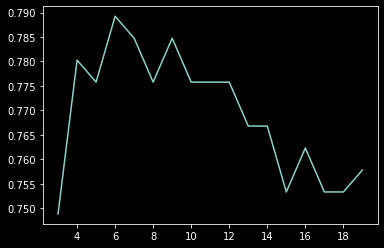

In [28]:
import matplotlib.pyplot as plt
plt.plot(ran, scores)

### Optimal value of max depth = 6

In [31]:
# Altering minimum leaves
# Altering the hyper-parameters
## Maxdepth
scores=[]
ran = range(1,25)
for i in ran:
    rfc = RandomForestClassifier(max_depth=6,min_samples_leaf=i)
    rfc.fit (trainx, trainy)
    scores.append(rfc.score(testx, testy))

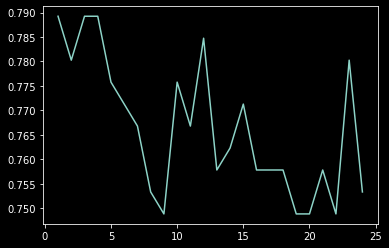

In [32]:
import matplotlib.pyplot as plt
plt.plot(ran, scores)

## Final Random Forest module

In [38]:
rfc = RandomForestClassifier(max_depth=6)
rfc.fit (trainx, trainy)
pred = rfc.predict (testx)
score = rfc.score(testx, testy)
print(f'Accuracy = {(score*100).round(2)}')

Accuracy = 77.58


### Finding important features

In [40]:
rfc.feature_importances_

array([0.08215123, 0.12075698, 0.04194311, 0.02292665, 0.07991297,
       0.31752878, 0.19547619, 0.01058428, 0.01780853, 0.0048957 ,
       0.00632517, 0.00545775, 0.00115783, 0.00582359, 0.01855863,
       0.01381272, 0.0105729 , 0.00147026, 0.00234161, 0.00197114,
       0.00067536, 0.01316045, 0.01158859, 0.01309958])

In [44]:
pd.Series(rfc.feature_importances_, index= trainx.columns )

Age           0.082151
Fare          0.120757
Pclass_1      0.041943
Pclass_2      0.022927
Pclass_3      0.079913
Sex_female    0.317529
Sex_male      0.195476
SibSp_0       0.010584
SibSp_1       0.017809
SibSp_2       0.004896
SibSp_3       0.006325
SibSp_4       0.005458
SibSp_5       0.001158
SibSp_8       0.005824
Parch_0       0.018559
Parch_1       0.013813
Parch_2       0.010573
Parch_3       0.001470
Parch_4       0.002342
Parch_5       0.001971
Parch_6       0.000675
Embarked_C    0.013160
Embarked_Q    0.011589
Embarked_S    0.013100
dtype: float64

### Gender and Fare are the most important features.